# Jamboree Business case - Arghya Aratder

# Define Problem Statement and perform Exploratory Data Analysis

## Definition of problem

- understand what factors are important in graduate admissions and how these factors are interrelated among themselves
- help predict one's chances of admission given the rest of the variables
- use linear Regression to predict the chance of a student getting into IVY league colleges given the independent variables
- check the performance of the model
- check the assumptions on the data used for Linear Regression

## import all dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2, chi2_contingency
from scipy.stats import t, norm, ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import pearsonr ,spearmanr
from scipy import stats
import statsmodels.api as sm
import statistics
from scipy.stats import poisson, binom
from scipy.stats import levene
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Observations on shape of data, data types of all the attributes , missing value detection, statistical summary

In [2]:
df = pd.read_csv("jamboree.csv")
data = pd.read_csv("jamboree.csv")

In [3]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.shape

(500, 9)

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Univariate Analysis

In [11]:
# Serial No is not an important column so dropping it since it might introduce Linearity in the final model
df.drop(['Serial No.'], axis=1, inplace=True)

In [29]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


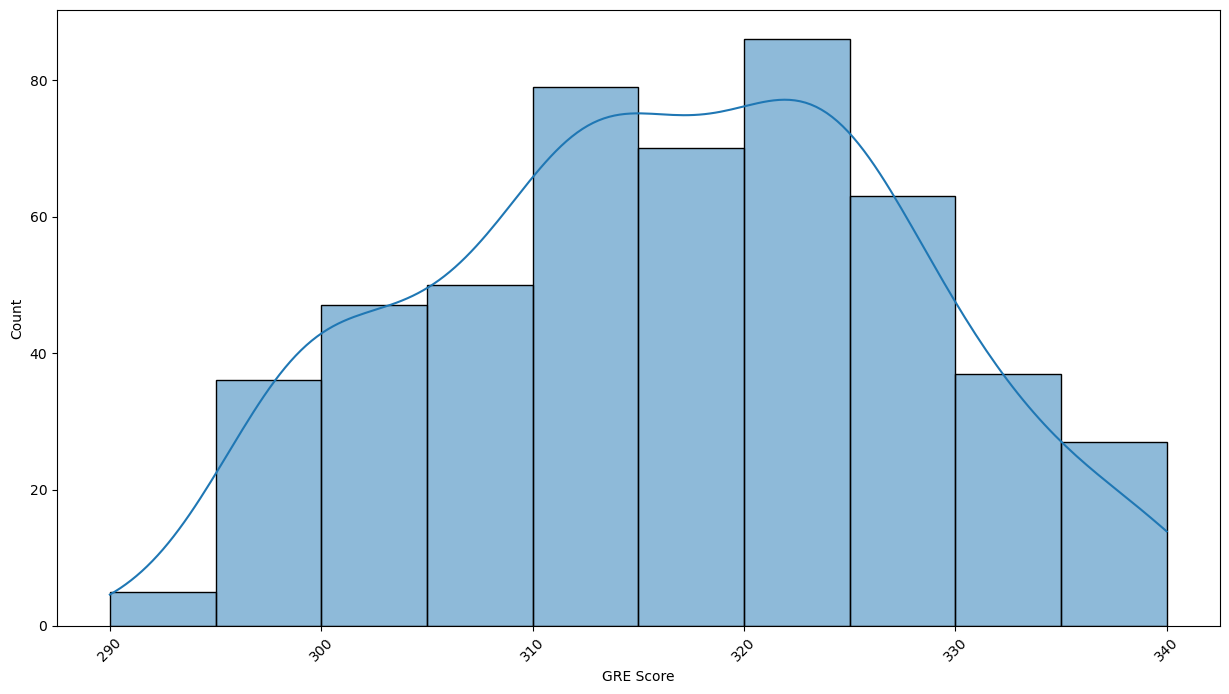

In [19]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="GRE Score", bins=10, data = df, kde=True)
plt.show()

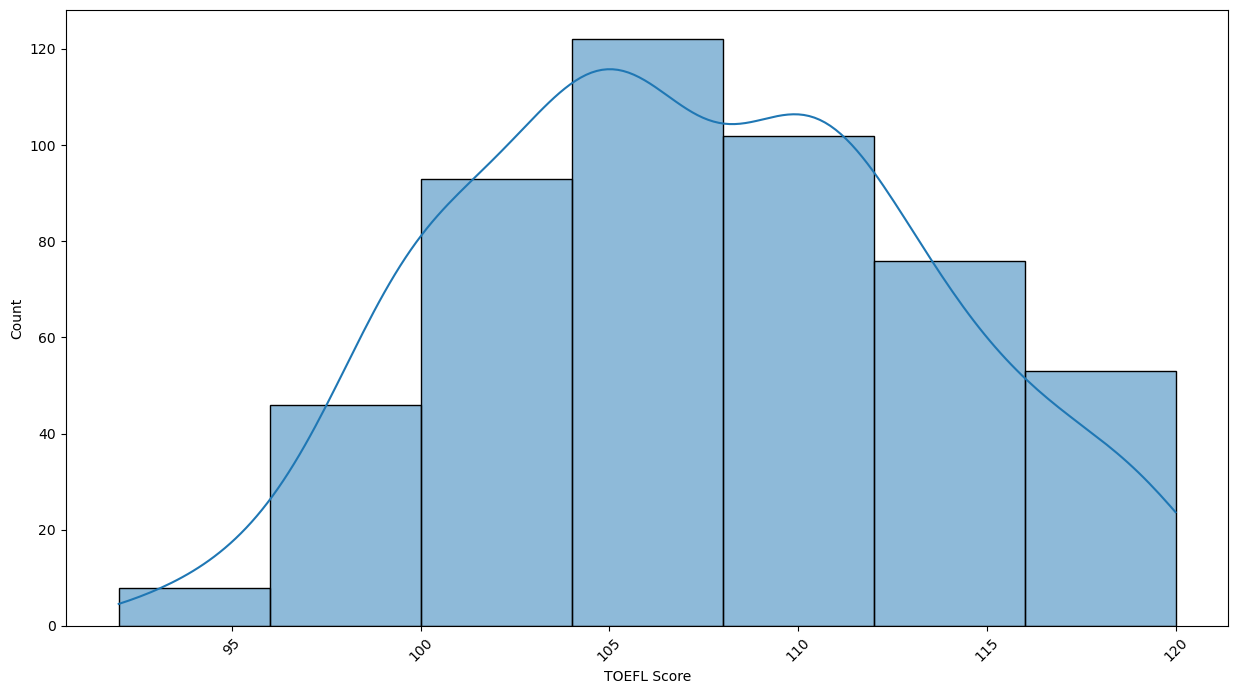

In [22]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="TOEFL Score", bins=7, data = df, kde=True)
plt.show()

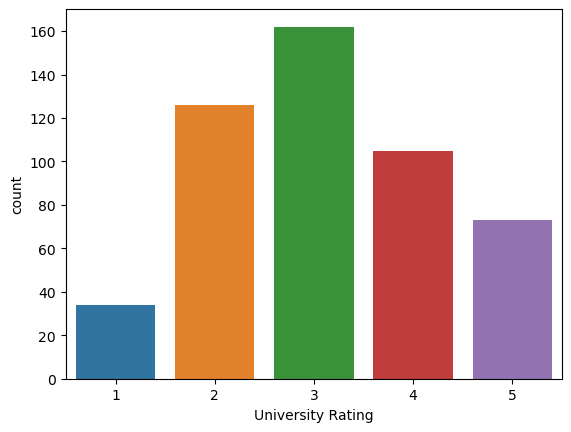

In [32]:
sns.countplot(x ='University Rating', data = df)
plt.show()

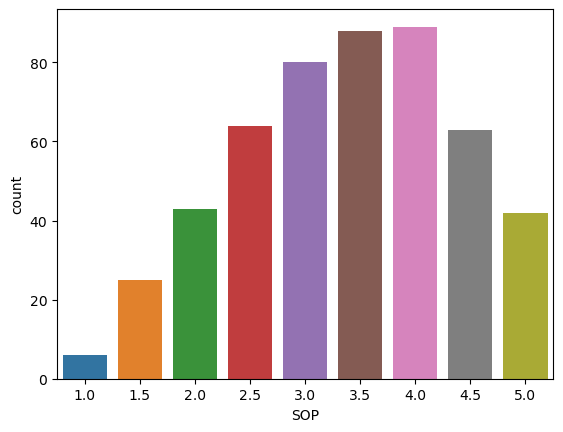

In [33]:
sns.countplot(x ='SOP', data = df)
plt.show()

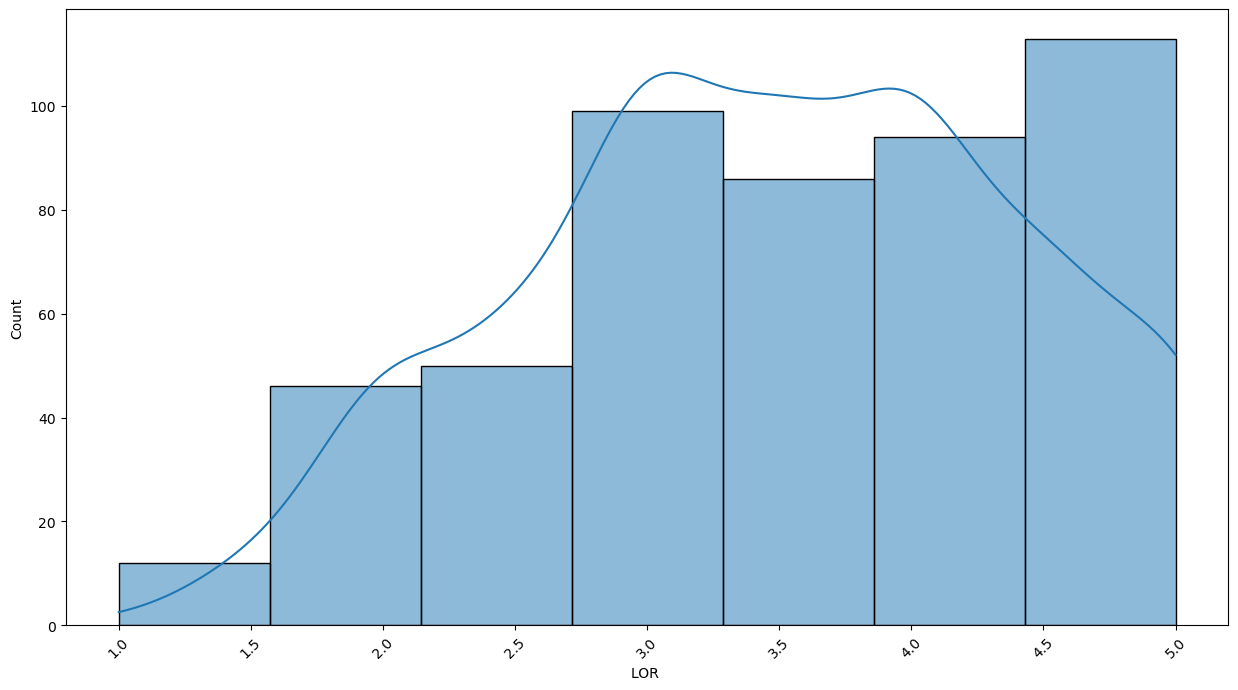

In [50]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="LOR ", bins=7, data = df, kde=True)
plt.show()

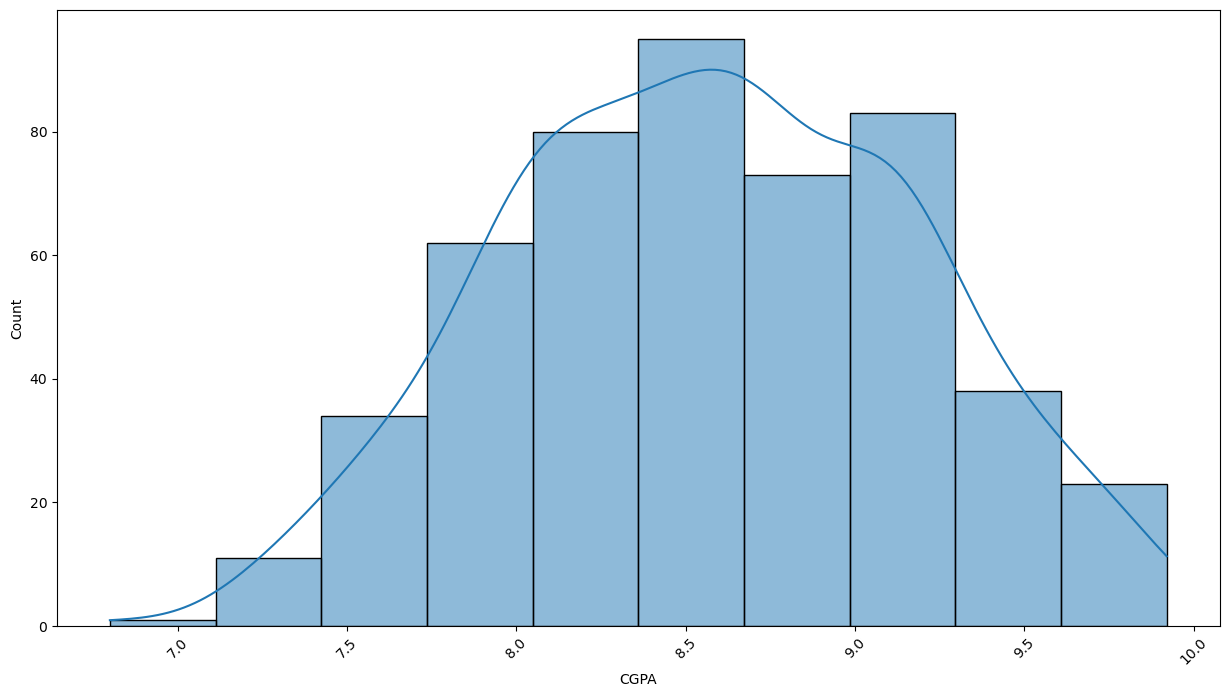

In [37]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="CGPA", bins=10, data = df, kde=True)
plt.show()

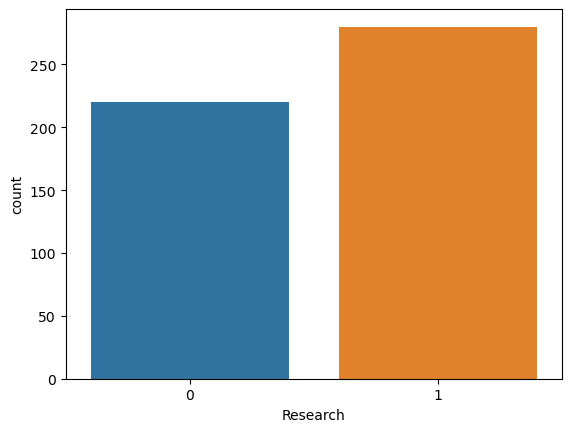

In [38]:
sns.countplot(x ='Research', data = df)
plt.show()

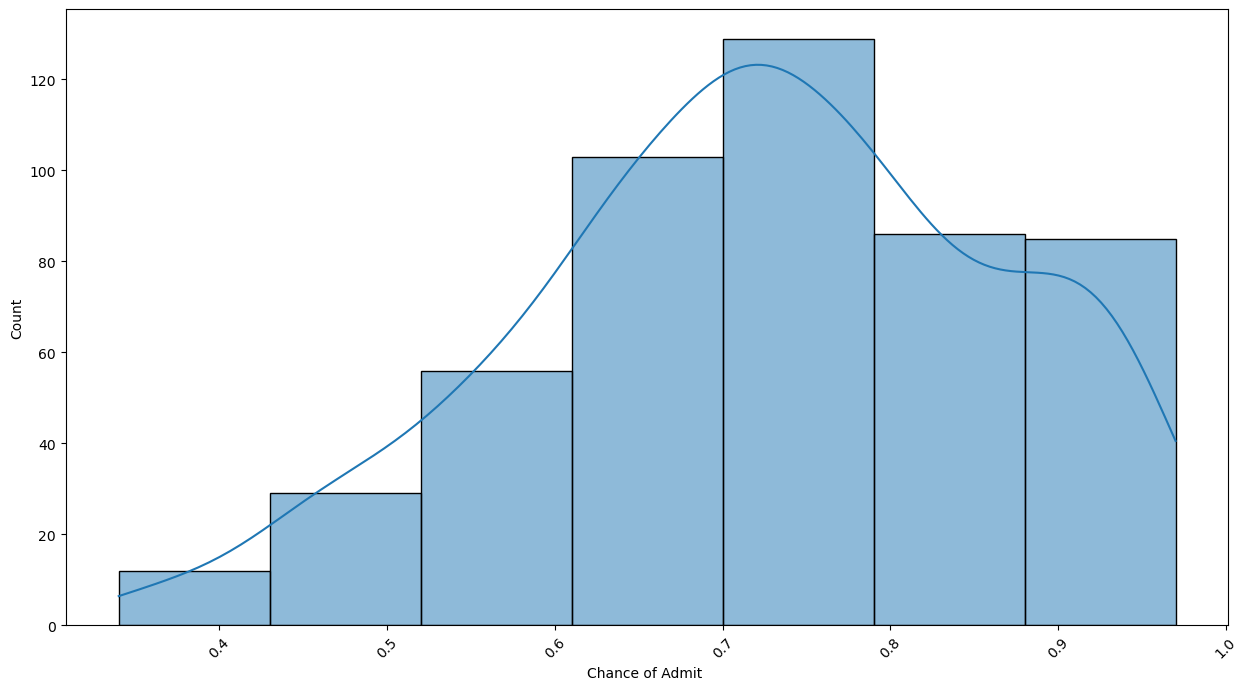

In [54]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x='Chance of Admit ', bins=7, data = df, kde=True)
plt.show()

## Bivariate Analysis

<AxesSubplot:>

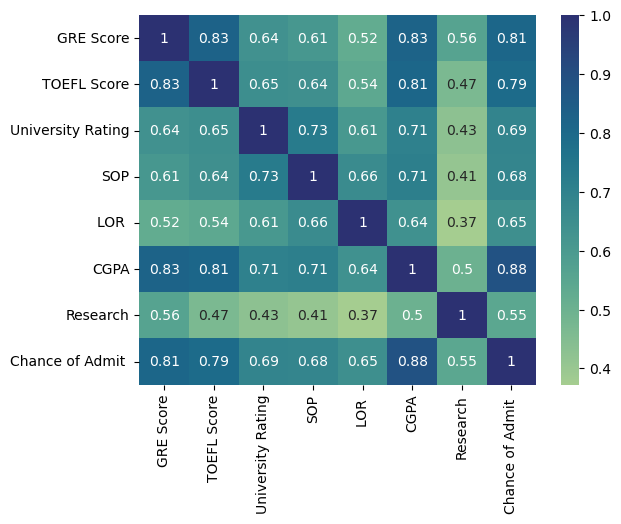

In [55]:
sns.heatmap(df.corr(),annot=True, cmap="crest")

<Figure size 800x800 with 0 Axes>

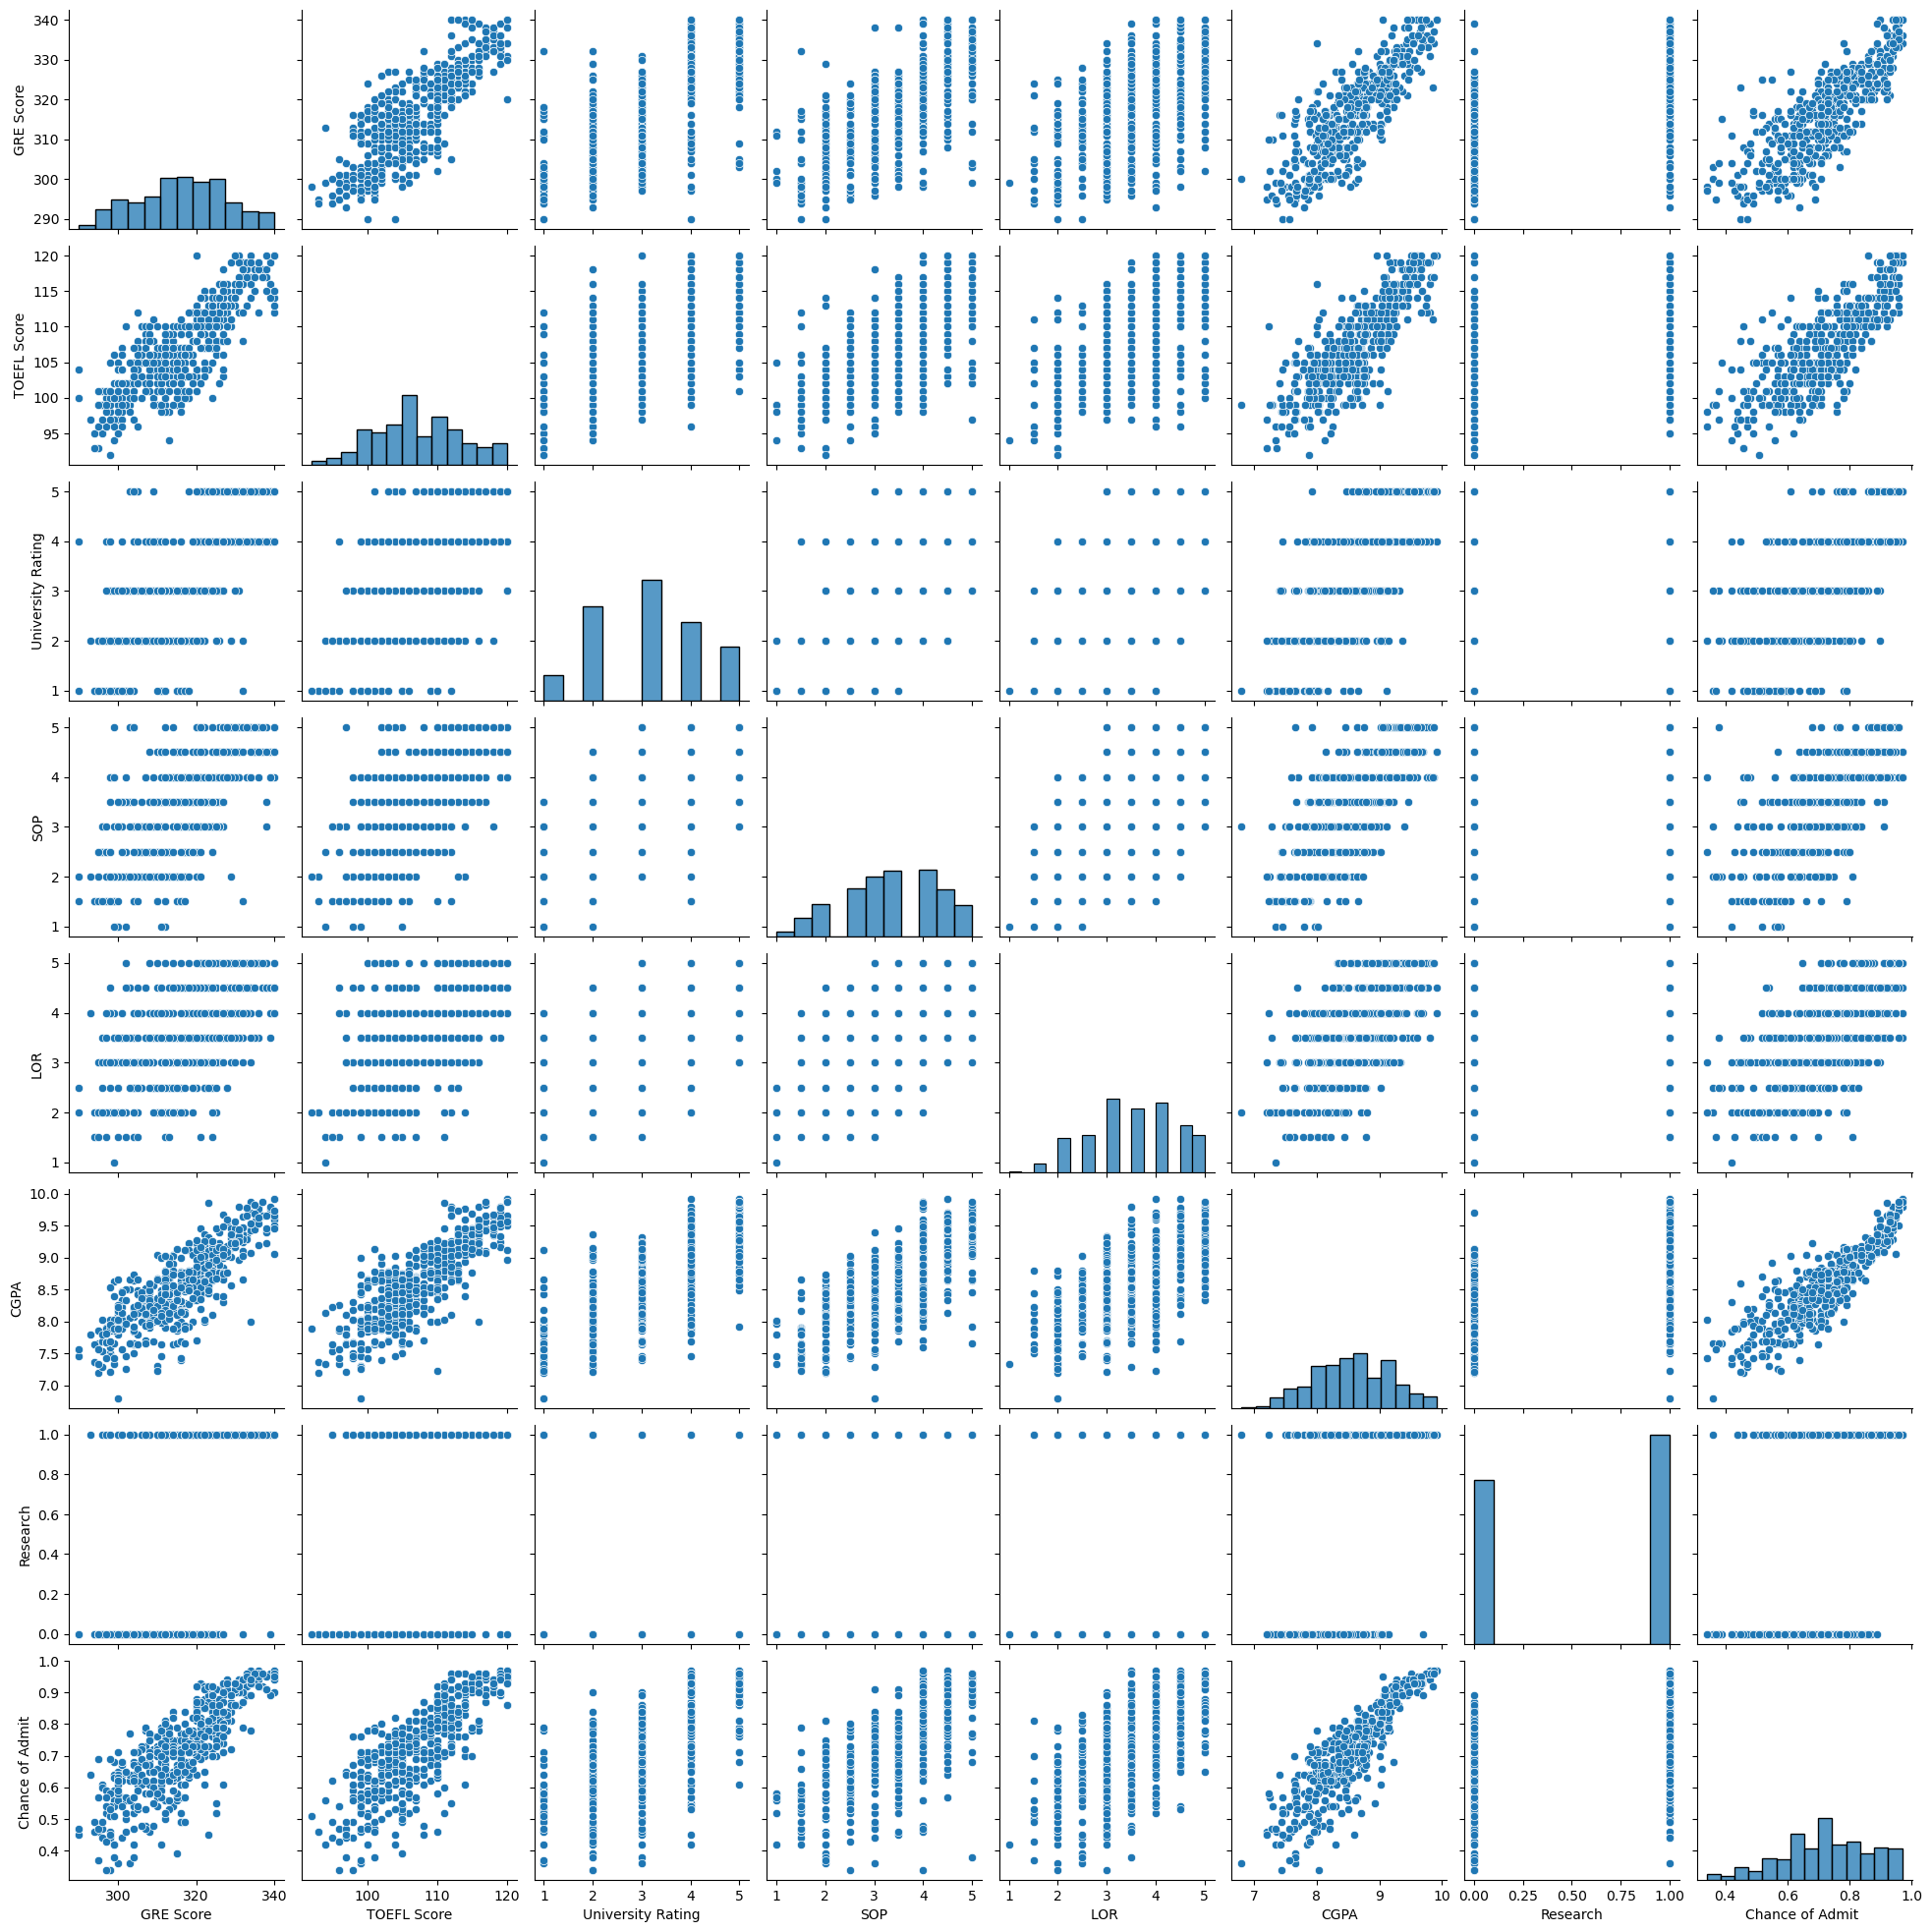

In [64]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.iloc[:, :])

## Insights based on EDA

- TOEFL and GRE score are having a pretty high correlation
- University rating and CGPA and SOP have a pretty high correlation 
- Chance of Admit seems to be pretty closely related to CGPA , GRE and TOEFL score

# Data Preprocessing

## Duplicate value check

In [66]:
df.duplicated().sum()

0

**Insight:** There are no duplicate rows in the dataset

## Missing value treatment

In [67]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Insight:** There are no missing values in this dataset

## Outlier treatment

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score'>

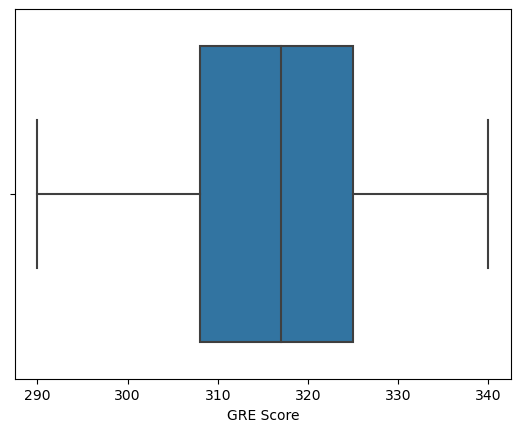

In [68]:
sns.boxplot(df['GRE Score'])

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL Score'>

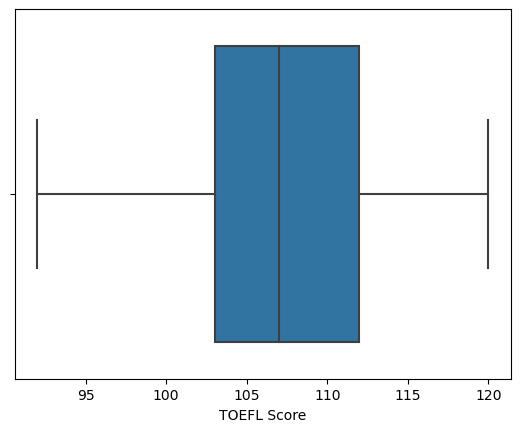

In [69]:
sns.boxplot(df['TOEFL Score'])

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University Rating'>

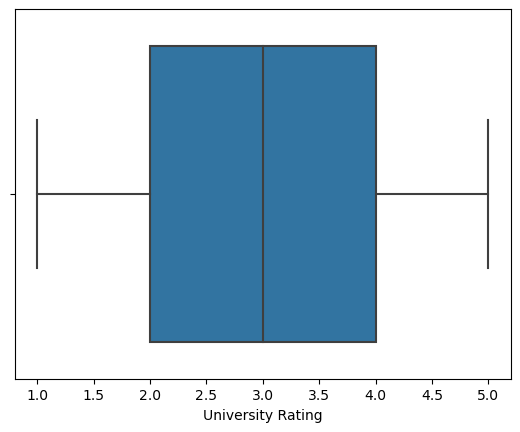

In [70]:
sns.boxplot(df['University Rating'])

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP'>

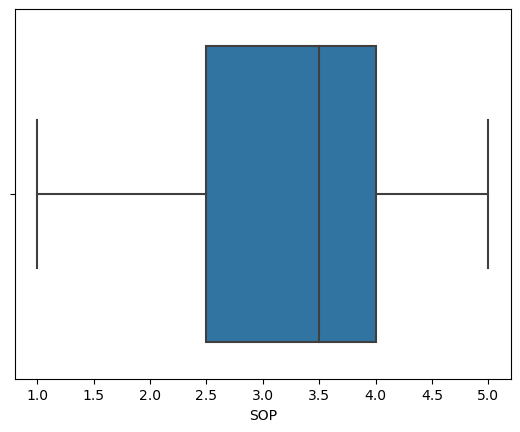

In [71]:
sns.boxplot(df['SOP'])

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOR '>

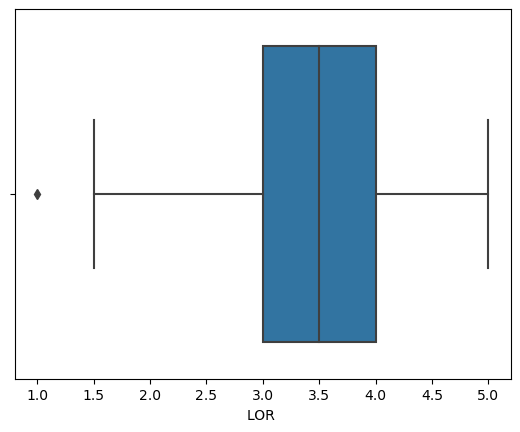

In [72]:
sns.boxplot(df['LOR '])

In [77]:
p25 = df['LOR '].quantile(0.25)
p75 = df['LOR '].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

In [78]:
df[df['LOR '] > upper_limit]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [79]:
df[df['LOR '] < lower_limit]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [86]:
df.drop(df[df['LOR '] < lower_limit].index, inplace=True)
df[df['LOR '] < lower_limit]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA'>

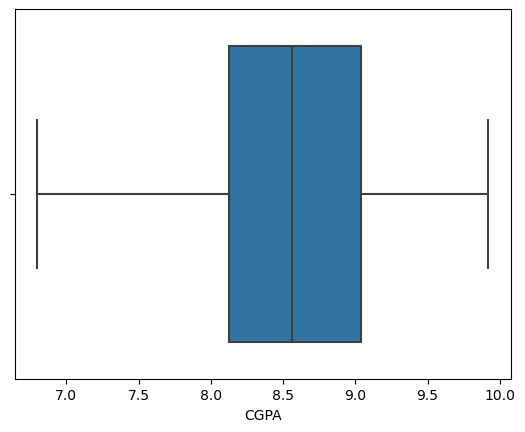

In [73]:
sns.boxplot(df['CGPA'])

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chance of Admit '>

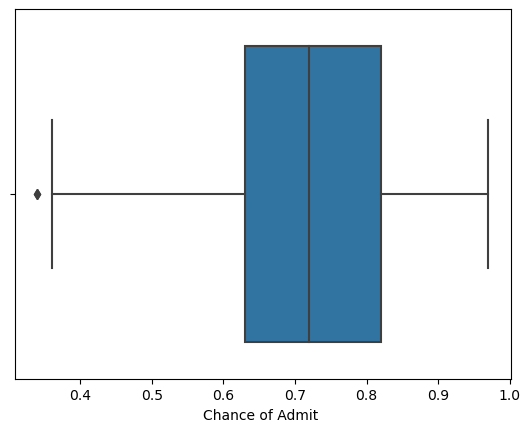

In [74]:
sns.boxplot(df['Chance of Admit '])

In [87]:
p25 = df['Chance of Admit '].quantile(0.25)
p75 = df['Chance of Admit '].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

In [88]:
df[df['Chance of Admit '] > upper_limit]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [89]:
df[df['Chance of Admit '] < lower_limit]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [90]:
df.drop(df[df['Chance of Admit '] < lower_limit].index, inplace=True)
df[df['Chance of Admit '] < lower_limit]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


**Insight:** removed outliers for Chance of Admit and LOR columns

## Data preparation for modeling

In [91]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()

In [124]:
df.rename(columns = {'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace = True)

In [125]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [126]:
df1=pd.DataFrame(min_max_scaler.fit_transform(df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research']]),columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'])
df1["Chance of Admit"]=df["Chance of Admit"]
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0,0.92
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0,0.76
2,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0,0.72
3,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0,0.80
4,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0,0.65


In [128]:
df1.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      3
dtype: int64

In [131]:
df1.dropna(inplace=True)
df1.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
y=df1["Chance of Admit"]
df1.drop(columns=["Chance of Admit"],inplace=True)

In [134]:
X_train,X_test,y_train,y_test= train_test_split(df1,y,test_size=0.2,random_state=10)

In [138]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
164,0.64,0.642857,1.00,0.875,0.714286,0.695513,0.0
229,0.46,0.428571,0.50,0.750,0.857143,0.592949,0.0
108,0.28,0.392857,1.00,1.000,0.714286,0.589744,0.0
348,0.56,0.535714,0.50,0.500,0.571429,0.471154,1.0
232,0.28,0.285714,0.25,0.375,0.571429,0.407051,0.0
...,...,...,...,...,...,...,...
321,0.48,0.535714,0.25,0.375,0.714286,0.471154,0.0
15,0.48,0.464286,0.50,0.625,0.285714,0.480769,0.0
487,0.34,0.464286,0.25,0.375,0.857143,0.423077,1.0
126,0.58,0.714286,0.50,0.375,0.142857,0.612179,1.0


In [139]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
276,0.60,0.321429,0.25,0.375,0.428571,0.583333,0.0
454,0.10,0.250000,0.00,0.250,0.000000,0.246795,0.0
153,0.72,0.571429,0.50,0.500,0.571429,0.669872,0.0
304,0.62,0.607143,0.50,0.625,0.571429,0.641026,1.0
147,0.98,0.857143,0.75,0.750,0.571429,0.961538,1.0
...,...,...,...,...,...,...,...
337,0.66,0.571429,1.00,0.750,0.714286,0.621795,1.0
50,0.46,0.214286,0.50,0.375,0.857143,0.480769,1.0
263,0.70,0.642857,0.25,0.500,0.285714,0.628205,1.0
34,0.82,0.714286,1.00,0.750,1.000000,0.961538,1.0


In [140]:
y_train

164    0.81
229    0.82
108    0.93
348    0.57
232    0.69
       ... 
321    0.73
15     0.54
487    0.79
126    0.85
266    0.72
Name: Chance of Admit, Length: 395, dtype: float64

In [141]:
y_test

276    0.89
454    0.71
153    0.79
304    0.62
147    0.83
       ... 
337    0.94
50     0.76
263    0.70
34     0.94
78     0.44
Name: Chance of Admit, Length: 99, dtype: float64

# Model building 

## Build the Linear Regression model

In [142]:
import statsmodels.api as sm
X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_sm)


In [143]:
results = model.fit()

## Display model coefficients with column names

In [144]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     21.96
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           5.53e-25
Time:                        19:09:33   Log-Likelihood:                 286.15
No. Observations:                 395   AIC:                            -556.3
Df Residuals:                     387   BIC:                            -524.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5172      0.01

## Ridge and Lasso regression

In [145]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [146]:
degree = 10
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [147]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [148]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=0.01)
ridge_model = Ridge(alpha=1.0)


In [149]:
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

Ridge()

In [150]:
lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 0.014123325323642624
test MSE for L2: 0.0377846859663661


# Testing the assumptions of the linear regression model 

## Multicollinearity check by VIF score

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,38.03
0,GRE Score,27.93
1,TOEFL Score,27.89
3,SOP,18.31
2,University Rating,11.03
4,LOR,10.77
6,Research,3.61


In [165]:
cols2 = vif["Features"][1:].values
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['CGPA']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) :
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features     LOR
VIF         2.78
Name: 0, dtype: object
Current adj.R2 0.024448185291703894
Features removed: 2
List of features removed: ['CGPA', 'University Rating']


## The mean of residuals is nearly zero

In [168]:
X_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_sm).fit()
Y_hat = sm_model.predict(X_sm)
residual = Y_hat - y_train
residual.mean()

-1.9004488559501255e-15

**Insight:** The mean of residuals is nearly ZERO

## Linearity of variables

eval_env: 1


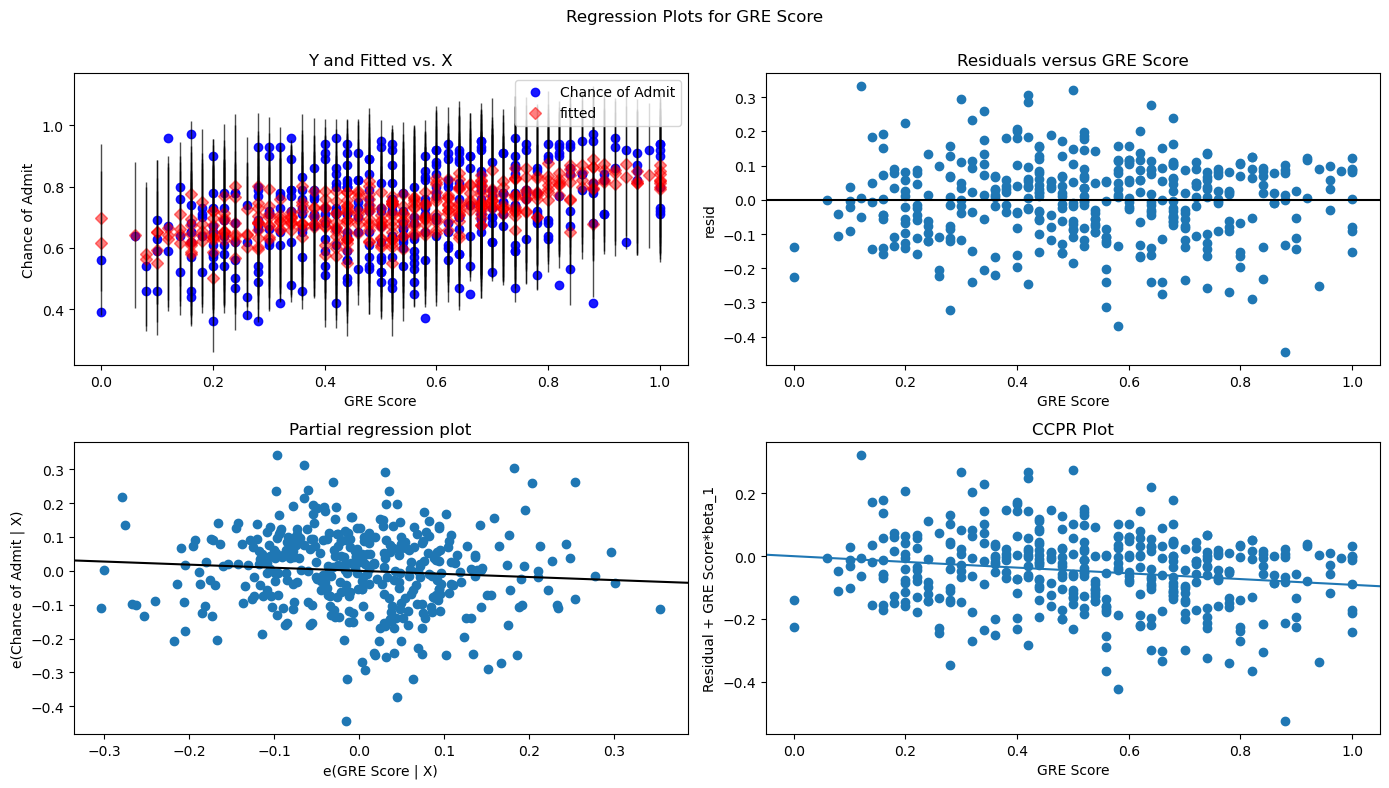

In [174]:
fig = plt.figure(figsize=(14, 8)) 
  

fig = sm.graphics.plot_regress_exog(sm_model, 
                                    'GRE Score', 
                                    fig=fig) 

eval_env: 1


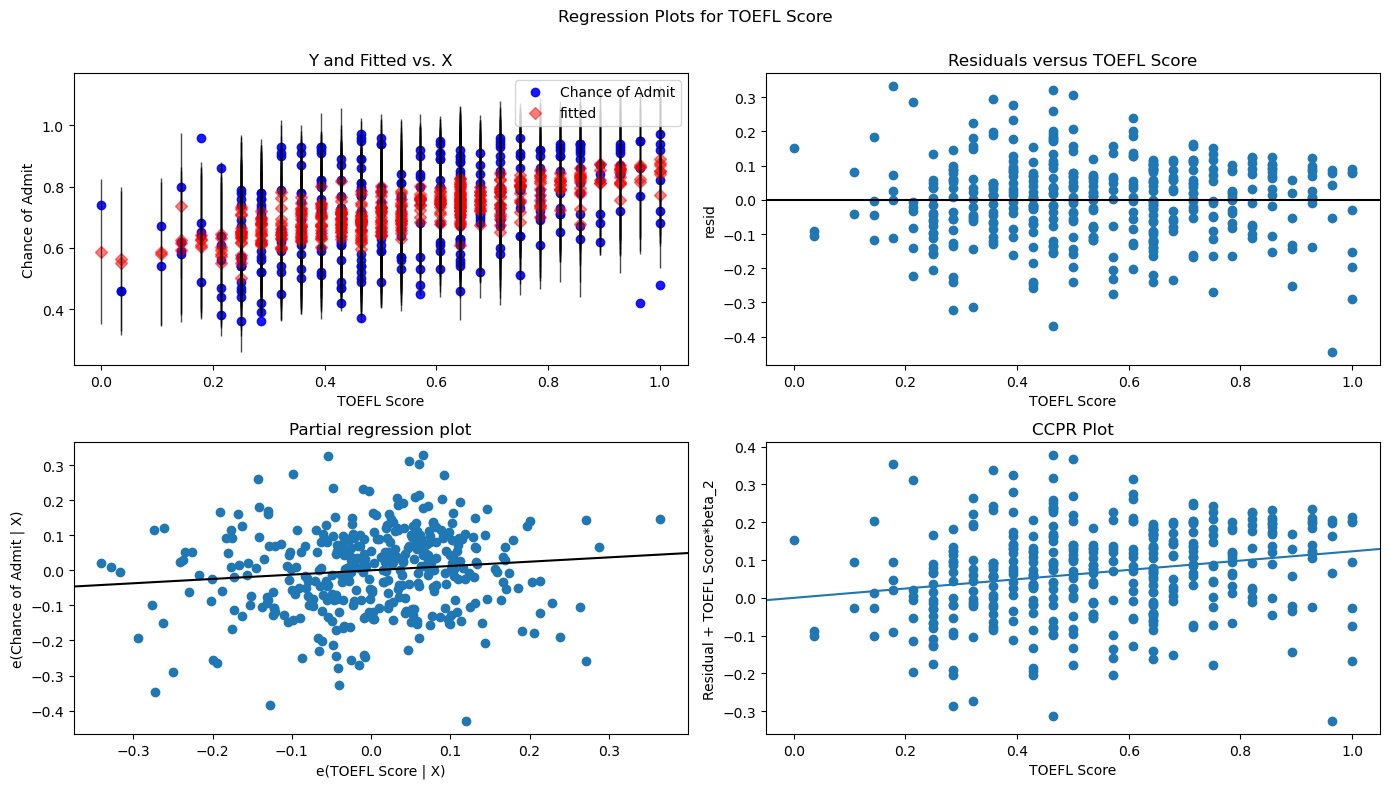

In [179]:
fig = plt.figure(figsize=(14, 8)) 
  
fig = sm.graphics.plot_regress_exog(sm_model, 
                                    'TOEFL Score', 
                                    fig=fig) 

eval_env: 1


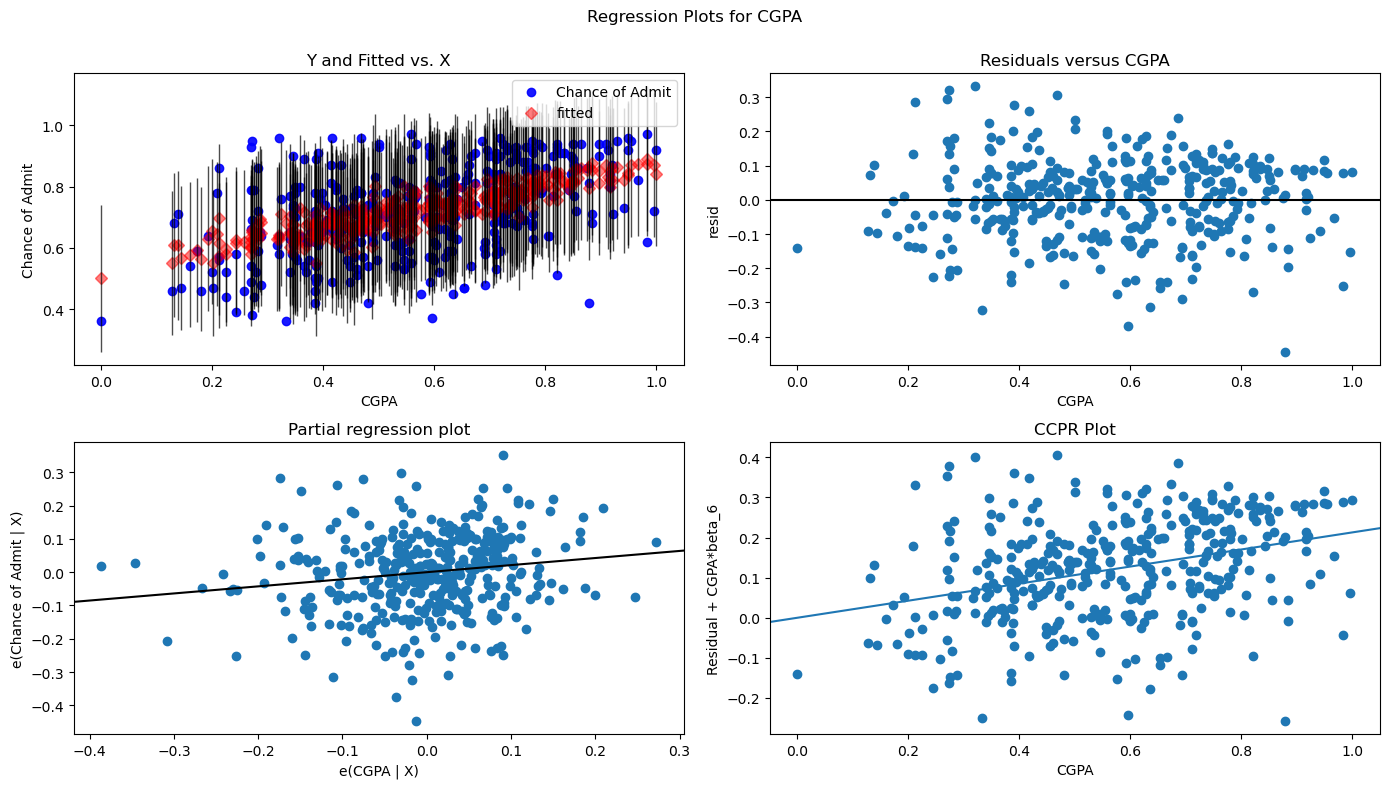

In [180]:
fig = plt.figure(figsize=(14, 8)) 
  
fig = sm.graphics.plot_regress_exog(sm_model, 
                                    'CGPA', 
                                    fig=fig) 

eval_env: 1


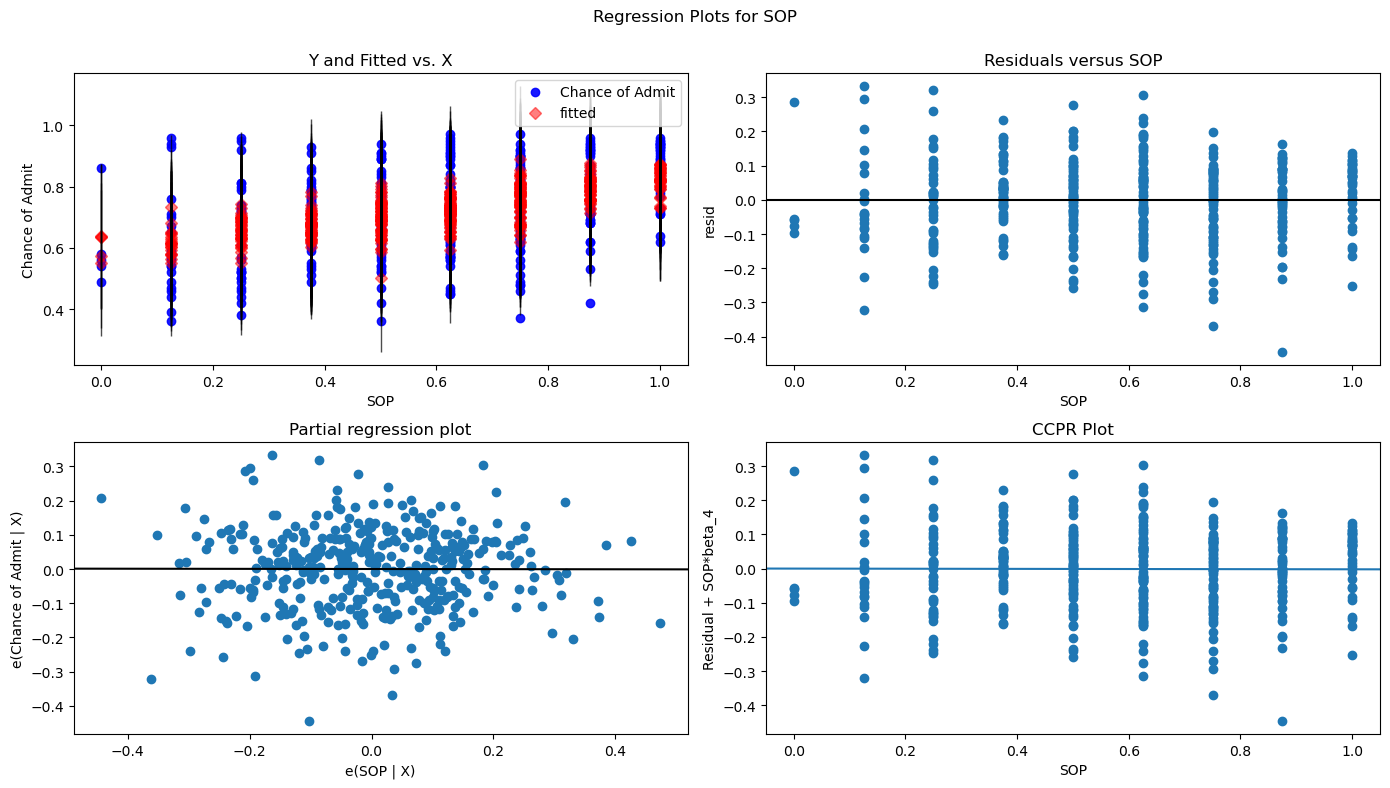

In [181]:
fig = plt.figure(figsize=(14, 8)) 
  
fig = sm.graphics.plot_regress_exog(sm_model, 
                                    'SOP', 
                                    fig=fig) 

eval_env: 1


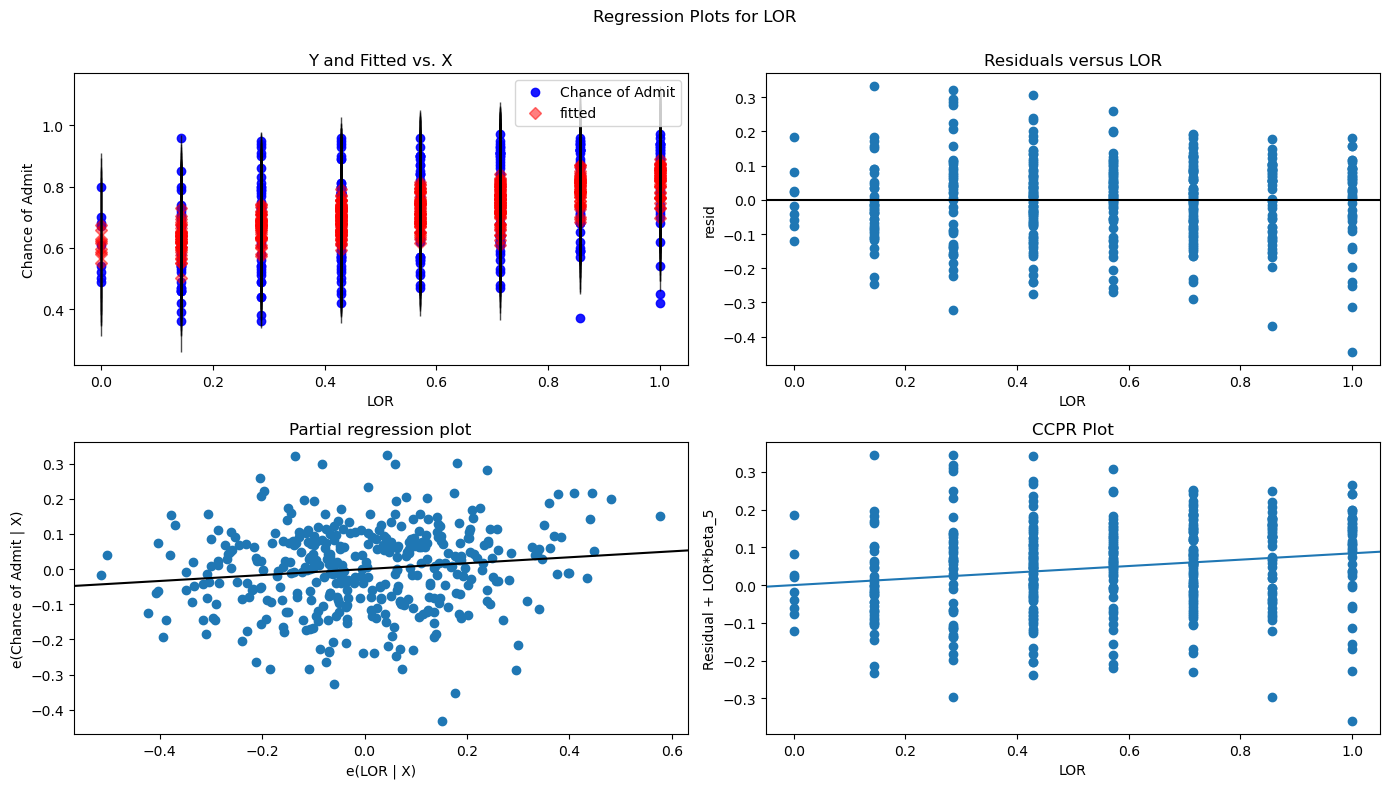

In [182]:
fig = plt.figure(figsize=(14, 8)) 
  
fig = sm.graphics.plot_regress_exog(sm_model, 
                                    'LOR', 
                                    fig=fig) 

**Insight:** As can be seen there is no clear pattern in residual plots . Hence we can conclude that there is no Linearity in variables

## Test for Homoscedasticity

In [183]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 1.008492511429125), ('p-value', 0.4767716451379109)]

**Insight:** 
- p-value of 0.47 indicates that this difference is not statistically significant at conventional levels of significance (alpha =  0.05)

- Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data

## Normality of residuals

Text(0.5, 1.0, 'Histogram of residuals')

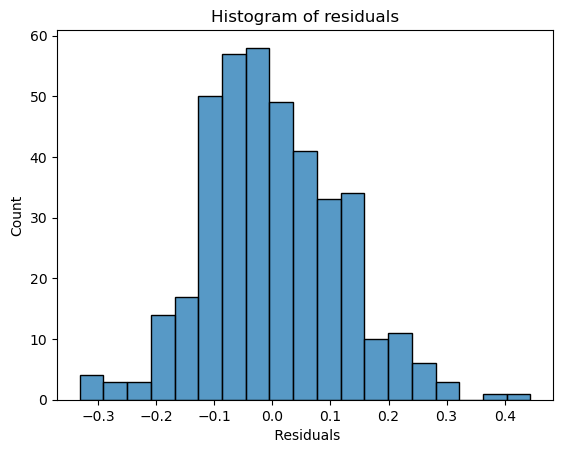

In [185]:
import seaborn as sns
sns.histplot(residual)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

**Insight:** We can see that there is a clear bell shape in the residual histogram.

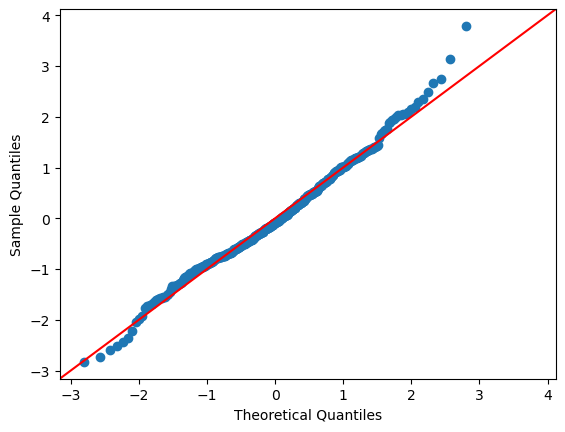

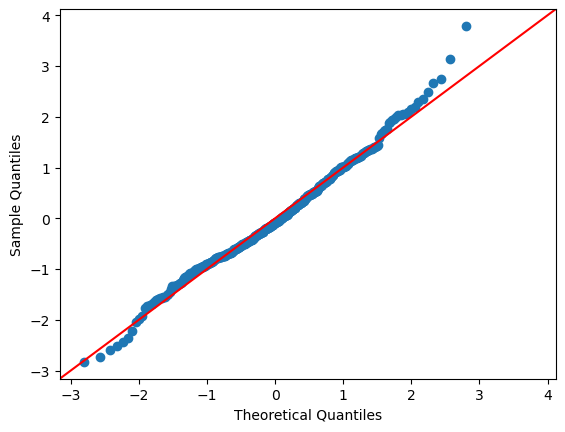

In [186]:
sm.qqplot(residual,line='45',fit=True,dist=stats.norm)

**Insight:** Since the QQ plot is almost linear. We can conclude that the Residuals are having a normal distribution.

# Model performance evaluation

## Model Metrics

In [188]:
sm_model.mse_total 

0.019260888003598278

In [189]:
sm_model.rsquared_adj

0.27136435158461625

In [190]:
sm_model.rsquared

0.2843096549828592

## Comments on the performance measures and if there is any need to improve the model

**Insight:** the MSE , r-squared and r-squared adjusted are pretty Low and the assumptions for Linear regression are met after cleaning and optimization activities are done . So this is a reasonably good model.

# Actionable Insights & Recommendations

## Comments on significance of predictor variables

- as can be seen from bivariate analysis and VIF values we could see there was a very high amount of multicilinearity in the data which had to be dealt with. 

- there are too much data present on similar kind of predictors like different kind of test scores and indicators like, CGPA, TOEFL score and GRE score.

## Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model

- The max value for Chance to Admit is 0.97 and not 1 and the min is 0.34 and not 0. Which means this is data set does not contain data of actual students who actually did get admitted and failed to get admitted with Chance values of 1 and 0 respectively. That would bolster the accuracy of this model

- They could include the JEE score, or Higher secondary scores as well.

- This model does not take into account the domain of the student if the student belongs from Science , Humanities, Arts , etc. In those cases Apprenticeship, intership outcome, last employer letter could become signifinact decision makers in the IVY leagues admission.

- A close off-shoot of this model would be a college recomender. where in if the student submits the details as mentioned in the data set the model would not only predict the change of Admit but also recommend which top 3 colleges has the highest probability of admission for that specific data point provided by the candidate. This could be a Paid feature for which the candidate has to pay extra to access this feature 